In [2]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings("ignore")

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [5]:
boston=load_boston()
x=pd.DataFrame(boston.data,columns=boston.feature_names)
y=pd.Series(boston.target)

In [6]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [9]:
gradientregressor=GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0)

In [10]:
model=gradientregressor.fit(xtrain,ytrain)

In [11]:
y_pred=model.predict(xtest)

In [12]:
r2_score(y_pred,ytest)

0.7200069560397446

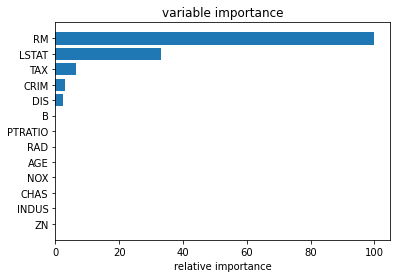

In [15]:
import matplotlib.pyplot as plt 
%matplotlib inline 
feature_importance=model.feature_importances_
feature_importance=100.0*(feature_importance/feature_importance.max())
sorted_idx=np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+0.5
plt.barh(pos,feature_importance[sorted_idx],align="center")
plt.yticks(pos,boston.feature_names[sorted_idx])
plt.xlabel('relative importance')

plt.title("variable importance")
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV
LR={"learning_rate":[0.15,0.1,.10,0.05],"n_estimators":[100,150,200,250]}

tuning=GridSearchCV(estimator=GradientBoostingRegressor(),
                   param_grid=LR,scoring="r2")

tuning.fit(xtrain,ytrain)
tuning.best_params_,tuning.best_score_

({'learning_rate': 0.15, 'n_estimators': 150}, 0.8758952969316478)